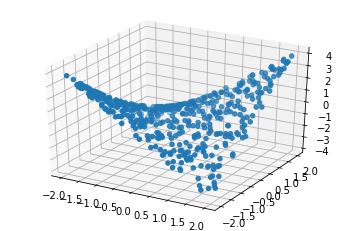

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# generate and plot the data
N = 500
X = np.random.random((N, 2))*4 - 2
Y = X[:,0]*X[:,1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

0 :  93.3099226246214    88.03665905781303
100 :  0.37124993315597665    0.3899655689407121
200 :  0.26236733052563727    0.29230224323293846
300 :  0.19174663955067295    0.21748011954652477
400 :  0.13706178992796827    0.1552725535257675
500 :  0.09635981705672599    0.10842208648747471
600 :  0.06895890004299378    0.07710753052777489
700 :  0.05191579218995935    0.05784063772341321
800 :  0.04156613019289304    0.04629554732309371
900 :  0.03514427451308245    0.039254925550797945
Final train cost:  0.030993593546487796
Final test cost:  0.03479714225533008


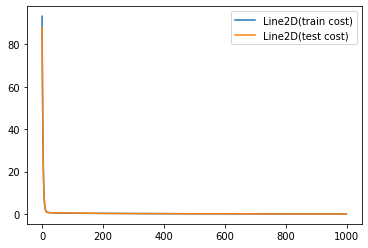

In [0]:
def sigmoid(X):
  return 1/(1 + np.exp(-X))

def softmax(y):
  ye = np.exp(y)
  ys = np.sum(ye, axis=1, keepdims=True)
  return ye/ys

def feedforward(X, W1, b1, W2, b2):
  Z = np.tanh(X.dot(W1) + b1)
  Y = Z.dot(W2) + b2

  return Y, Z

def classification_rate(Y, P):
  n_correct = 0
  n_total = 0

  for i in range(len(Y)):
    n_total += 1

    if Y[i] == P[i]:
      n_correct += 1
    
  return n_correct/n_total

def predict(P_Y_given_X):
    return np.argmax(P_Y_given_X, axis=1)

def cost(T, output):
  return ((T - output)**2).mean()

def der_w2(Z, T, Y):
  return (T-Y).dot(Z)

def der_b2(T, Y):
  return (T-Y).sum(axis=0)

def der_w1(X, Z, T, Y, W):
  return X.T.dot(np.outer(T - Y, W2) * (1 - Z * Z))

def der_b1(T, Y, W2, Z):
  return (np.outer(T - Y, W2) * (1 - Z * Z)).sum(axis=0)

def backpropagation(lr, epochs, X, Y, W1, b1, W2, b2):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
  train_costs = []
  test_costs = []
  nW1, nW2, nb1, nb2 = W1, W2, b1, b2
  for epoch in range(epochs):
    output_train, hidden_train = feedforward(X_train, nW1, nb1, nW2, nb2)
    output_test, hidden_test = feedforward(X_test, nW1, nb1, nW2, nb2)

    c_train = cost(Y_train, output_train)
    c_test = cost(Y_test, output_test)
    train_costs.append(c_train)
    test_costs.append(c_test)

    if epoch%100 == 0:
      print(epoch, ': ', c_train, '  ', c_test)

    #gradient ascent!
    nW2 += lr * der_w2(hidden_train, Y_train, output_train)
    nb2 += lr * der_b2(Y_train, output_train)
    nW1 += lr * der_w1(X_train, hidden_train, Y_train, output_train, nW2)
    nb1 += lr * der_b1(Y_train, output_train, nW2, hidden_train)

  print("Final train cost: ", cost(Y_train, output_train))
  print("Final test cost: ", cost(Y_test, output_test))

  legend1, = plt.plot(train_costs, label='train cost')
  legend2, = plt.plot(test_costs, label='test cost')
  plt.legend([legend1, legend2])
  plt.show()

  return np.hstack((output_train, output_test)), nW1, nb1, nW2, nb2

from sklearn.model_selection import train_test_split

M = 100
D = 2

W1 = np.random.randn(D, M)
b1 = np.zeros(M)
W2 = np.random.randn(M)
b2 = 0

Yhat, nW1, nb1, nW2, nb2 = backpropagation(1e-4, 1000, X, Y, W1, b1, W2, b2)

ValueError: ignored

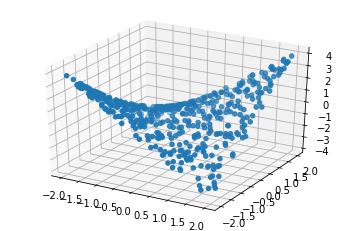

In [0]:
# plot the prediction with the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-2, 2, 20)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
_, Yhat = feedforward(Xgrid, nW1, nb1, nW2, nb2)
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()